<a href="https://www.kaggle.com/code/tolgaboroglu/diabetes-prediction-modelling?scriptVersionId=103959029" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# STORY OF THE DATASET 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Blood Pressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* DiabetesPedigreeFunction: Diabetes pedigree function
* BMI: Body mass index (weight in kg/(height in m)^2)
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1 (have diabetes), the others are 0 (dont have  diabetes)


# BUSINESS PROBLEM
Can we build a machine learning model to accurately predict whether the patients in the dataset have diabetes or not?

### First of all , you must import library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



import missingno as msno
from datetime import date

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x: '%.3f'%x)
pd.set_option('display.width',500)

def load():
    data = pd.read_csv('../input/diabetes-prediction-and-modelling/diabetes.csv')
    return  data

# EXPLORATORY DATA ANALYSIS

In [2]:
df = load()

In [3]:
def check_df(df, head=5):
    print("####################### shape ##########################")

    print(df.shape)

    print("####################### types ##########################")

    print(df.dtypes)

    print("####################### head ##########################")

    print(df.head)

    print("####################### tail ##########################")

    print(df.tail)

    print("####################### NA ##########################")

    print(df.isnull().sum)

    print("##################### Quantiles #####################")

    print(df.quantile([0,0.05,0.50,0.95,0.99,1]).T)

In [4]:
check_df(df)

####################### shape ##########################
(768, 9)
####################### types ##########################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
####################### head ##########################
<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0 33.600                     0.627   50        1
1              1       85             66             29        0 26.600                     0.351   31        0
2              8      183             64              0        0 23.300                     0.672   32        1
3    

Categoric and Numeric Values 

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "0"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                dataframe[col].dtypes != "0"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                dataframe[col].dtypes == "0"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations:{dataframe.shape[0]}")
    print(f"Variables:{dataframe.shape[1]}")
    print(f'cat_cols:"{len(cat_cols)}')
    print(f'num_cols:"{len(num_cols)}')
    print(f'cat_but_car:"{len(cat_but_car)}')
    print(f'num_but_cat:"{len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations:768
Variables:9
cat_cols:"1
num_cols:"8
cat_but_car:"0
num_but_cat:"1


Numeric

In [7]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [8]:
cat_cols

['Outcome']

Functional Numeric

In [9]:
def numSummary(dataframe, numericalCol, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
    print(dataframe[numericalCol].describe(quantiles).T)

    if plot:
        dataframe[numericalCol].hist()
        plt.xlabel(numericalCol)
        plt.title(numericalCol)
        plt.show(block=True)

Pregnancies:
count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
100%     17.000
max      17.000
Name: Pregnancies, dtype: float64


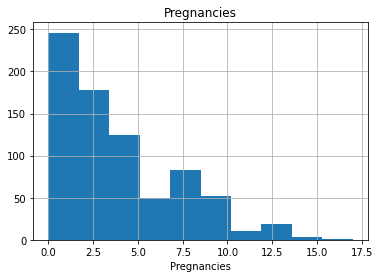

Glucose:
count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
100%    199.000
max     199.000
Name: Glucose, dtype: float64


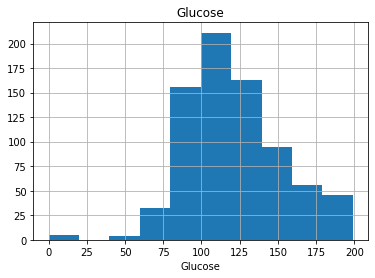

BloodPressure:
count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
100%    122.000
max     122.000
Name: BloodPressure, dtype: float64


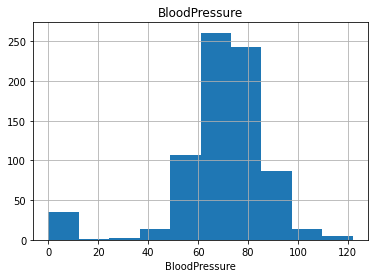

SkinThickness:
count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
100%     99.000
max      99.000
Name: SkinThickness, dtype: float64


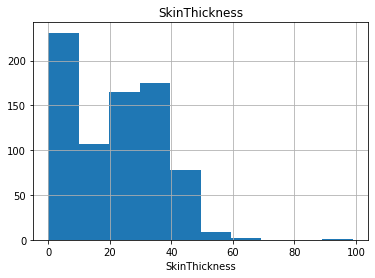

Insulin:
count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
100%    846.000
max     846.000
Name: Insulin, dtype: float64


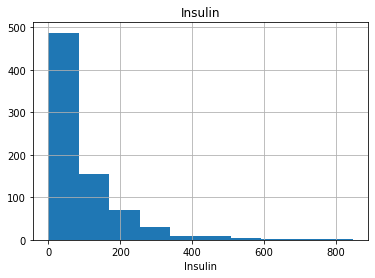

BMI:
count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
100%     67.100
max      67.100
Name: BMI, dtype: float64


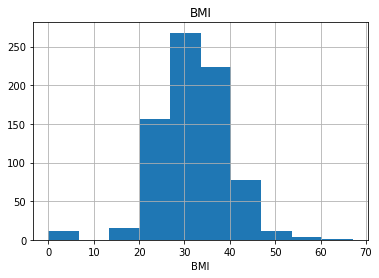

DiabetesPedigreeFunction:
count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
100%      2.420
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


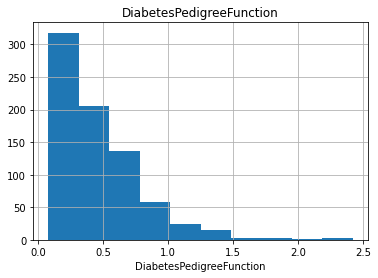

Age:
count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
100%     81.000
max      81.000
Name: Age, dtype: float64


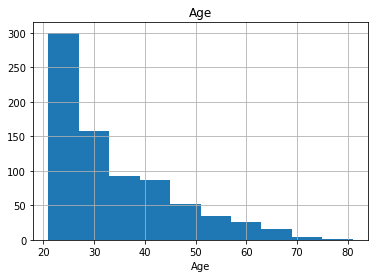

In [10]:
for col in num_cols:
    print(f"{col}:")
    numSummary(df, col, True)

Functional Categorical

In [11]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

   Outcome  Ratio
0      500 65.104
1      268 34.896
##########################################


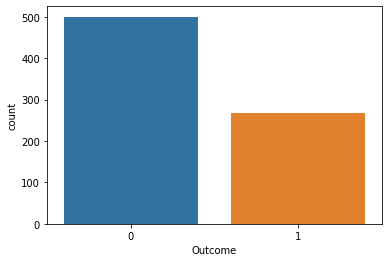

In [12]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        print(col)
    else:
        cat_summary(df, col, True)

In [13]:
def bar_plot(variable):
    """
    input: variable ex:"Sex"
    output: bar plot & value count
    """
    # get feature
    var= df[variable]
    # count number of categorical variable(value/sample)
    varValue= var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}". format(variable,varValue))

# Target Analyze

In [14]:
def target_summary_with_num(dataframe, target, numerical_col,plot=False):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n\n")

for col in num_cols:
        target_summary_with_num(df,"Outcome",col)  

         Pregnancies
Outcome             
0              3.298
1              4.866


         Glucose
Outcome         
0        109.980
1        141.257


         BloodPressure
Outcome               
0               68.184
1               70.825


         SkinThickness
Outcome               
0               19.664
1               22.164


         Insulin
Outcome         
0         68.792
1        100.336


           BMI
Outcome       
0       30.304
1       35.143


         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


           Age
Outcome       
0       31.190
1       37.067




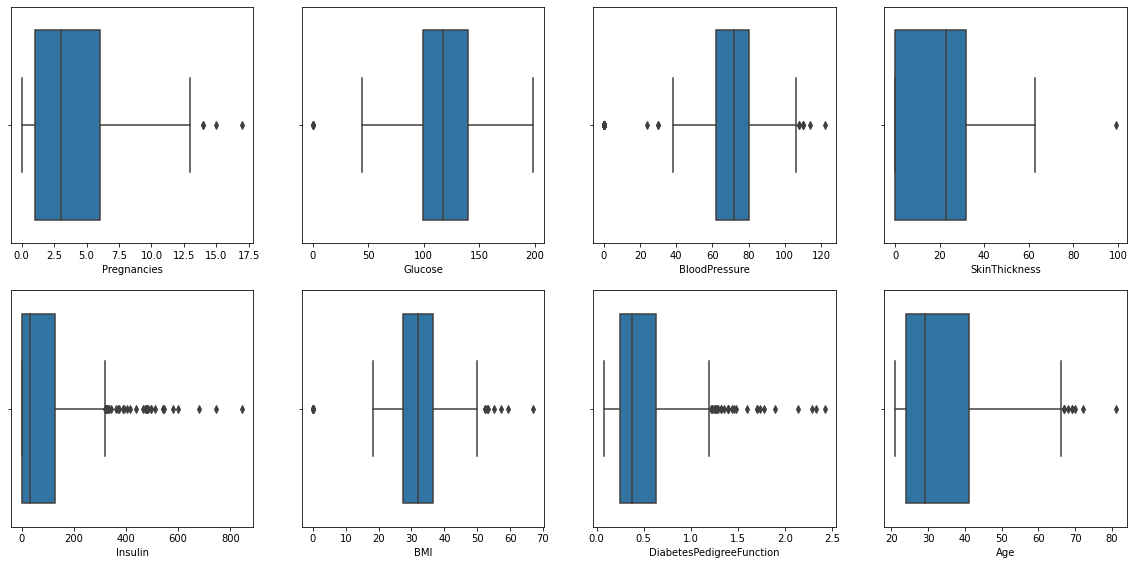

In [15]:
plt.rcParams["figure.figsize"] = (20,20)

for index, num_col in enumerate(num_cols):
    plt.subplot(4,4,index+1)
    sns.boxplot(x=num_col,data=df)
    
plt.show()

# Outliers

In [16]:
def outliers_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit , up_limit

In [17]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outliers_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name]>up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [18]:
 check_outlier(df, "Outcome")

False

In [19]:
def replace_with_thresholds(df, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(df, variable, q1=0.05, q3=0.95)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

In [20]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [21]:
for col in num_cols:
    print(col, "=>", check_outlier(df, col))

Pregnancies => True
Glucose => True
BloodPressure => True
SkinThickness => True
Insulin => True
BMI => True
DiabetesPedigreeFunction => True
Age => True


In [22]:
def grab_outliers(dataframe, col_name, index = False):
    low,up = outliers_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name]>low) | (dataframe[col_name] < up)].shape[0] > 10:
        print(dataframe[(dataframe[col_name]<low)| (dataframe[col_name] > up)].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name]> up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name]< low) | (dataframe[col_name] > up))].index
        return outlier_index

In [23]:
 for col in num_cols:
        print(col, grab_outliers(df, col, True))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
88            15      136             70             32      110 37.100                     0.153   43        1
159           17      163             72             41      114 40.900                     0.817   47        1
298           14      100             78             25      184 36.600                     0.412   46        1
455           14      175             62             30        0 33.600                     0.212   38        1
Pregnancies Int64Index([88, 159, 298, 455], dtype='int64')
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
75             1        0             48             20        0 24.700                     0.140   22        0
182            1        0             74             20       23 27.700                     0.299   21        0
342            1        0             68     

# Missing Values Analyze

In [24]:
def missing_values_table(dataframe,na_name = False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss,np.round(ratio,2)], axis=1, keys=['n_miss','ratio'])
    print(missing_df,end="\n")

    if na_name:
        return na_columns

missing_values_table(df)


Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Correlation

In [26]:
corr = df[num_cols].corr() 
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000


In [27]:
print(df.corr())

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction    Age  Outcome
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074 0.018                    -0.034  0.544    0.222
Glucose                         0.129    1.000          0.153          0.057    0.331 0.221                     0.137  0.264    0.467
BloodPressure                   0.141    0.153          1.000          0.207    0.089 0.282                     0.041  0.240    0.065
SkinThickness                  -0.082    0.057          0.207          1.000    0.437 0.393                     0.184 -0.114    0.075
Insulin                        -0.074    0.331          0.089          0.437    1.000 0.198                     0.185 -0.042    0.131
BMI                             0.018    0.221          0.282          0.393    0.198 1.000                     0.141  0.036    0.293
DiabetesPedigreeFunction       -0.034    0.137          0.041 

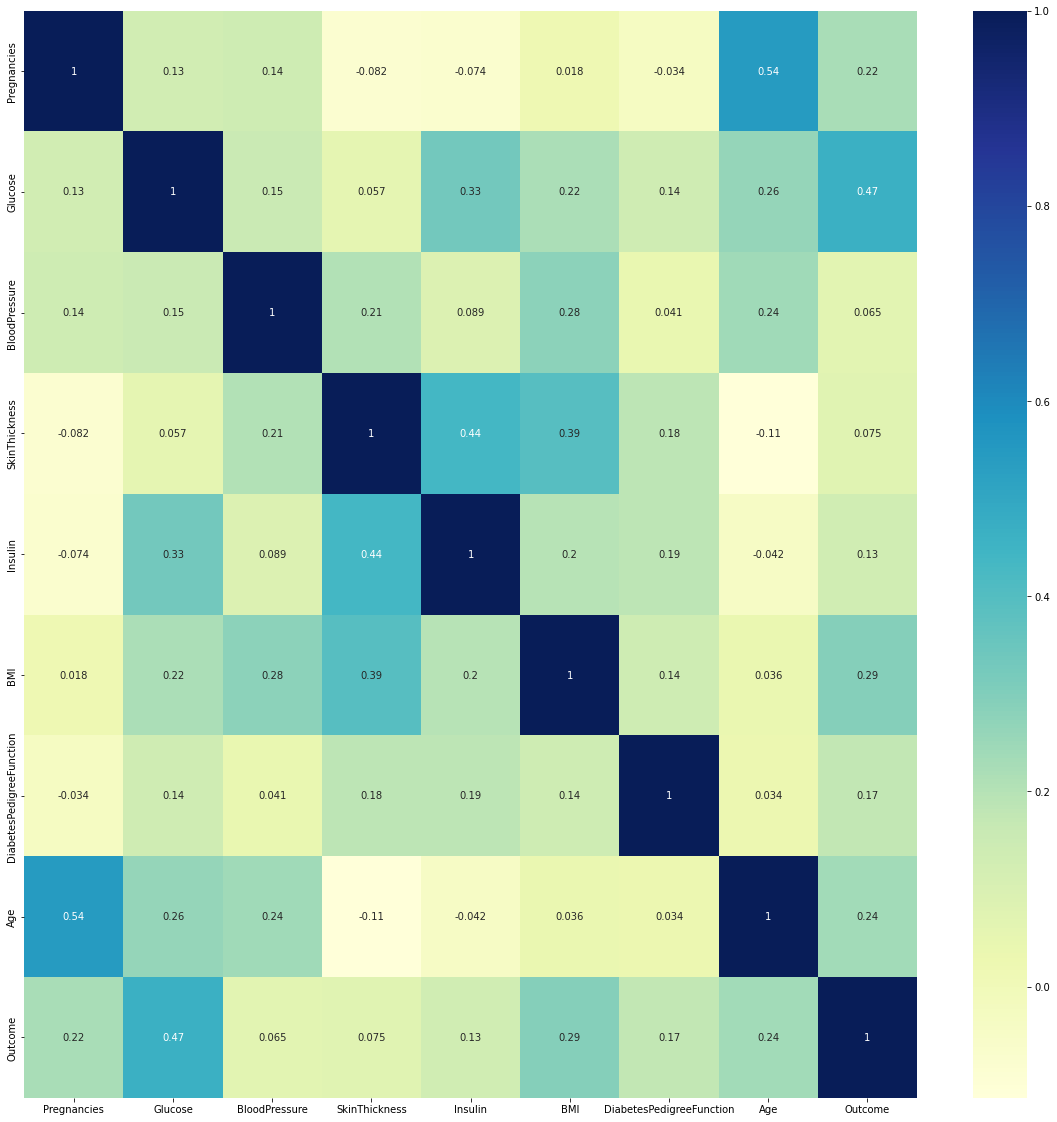

In [28]:
import seaborn as sb 
import matplotlib.pyplot as mp 

dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
mp.show()

X_train,y_train,X_test,y_test

In [29]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (614, 8)
Size of y_train :  (614, 1)
Size of X_test :  (154, 8)
Size of Y_test :  (154, 1)


In [30]:
y = df["Outcome"]
X = df.drop("Outcome",axis = 1)
X_train,X_test ,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42).fit(X_train,y_train)



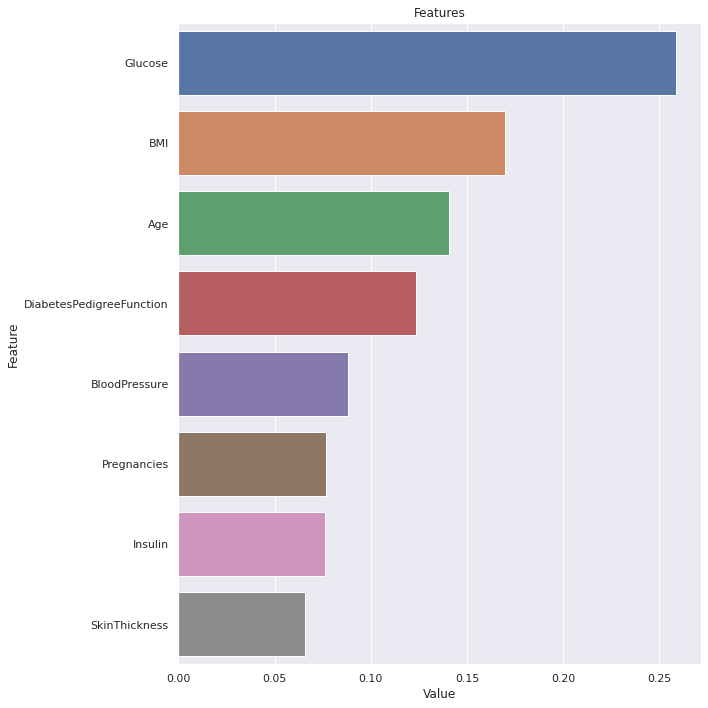

In [31]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

# Let's create new Variables

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


Category of Age

In [33]:
df["Age_Cat"] = pd.cut(
    df["Age"], bins=[0, 15, 25, 64, 82],
    labels=["Child", "Young", "Adult", "Senior"])
df["Age_Cat"].head()

0    Adult
1    Adult
2    Adult
3    Young
4    Adult
Name: Age_Cat, dtype: category
Categories (4, object): ['Child' < 'Young' < 'Adult' < 'Senior']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


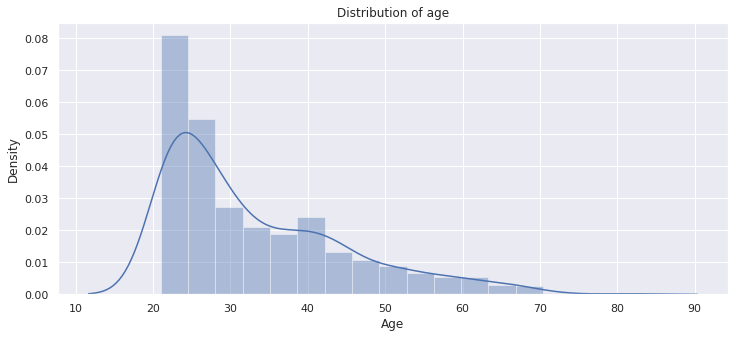

In [34]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["Age"], color = 'b')

BMI Group

In [35]:
df.loc[(df['BMI'] < 18.5), 'BMI_Group'] = 'Underweight'
df.loc[((df['BMI'] >= 18.5) & (df['BMI'] < 25)), 'BMI_Group'] = 'Normal'
df.loc[((df['BMI'] >= 25) & (df['BMI'] < 30)), 'BMI_Group'] = 'Overweight'
df.loc[(df['BMI'] >= 30), 'BMI_Group'] = 'Obese'

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


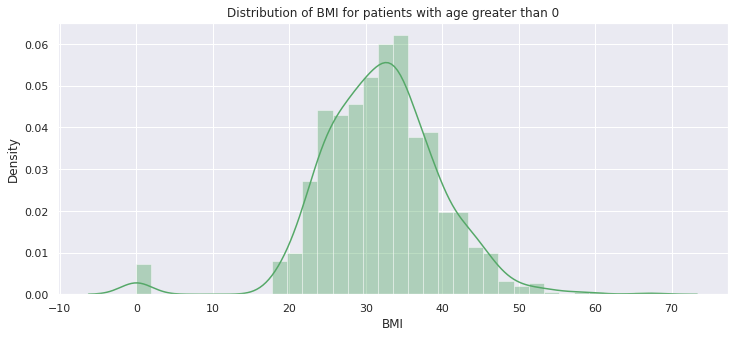

In [36]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI for patients with age greater than 0")
ax = sns.distplot(df[(df.Age >= 0)]['BMI'], color = 'g')

Glucose level

In [37]:
def glucose_level(dataframe, col_name="Glucose"):
    if 16 <= dataframe[col_name] <= 140:
        return "Normal"
    else:
        return "Abnormal"
df["Glucose_Level"] = df.apply(glucose_level, axis=1)
df["Glucose_Level"].head()

0    Abnormal
1      Normal
2    Abnormal
3      Normal
4      Normal
Name: Glucose_Level, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


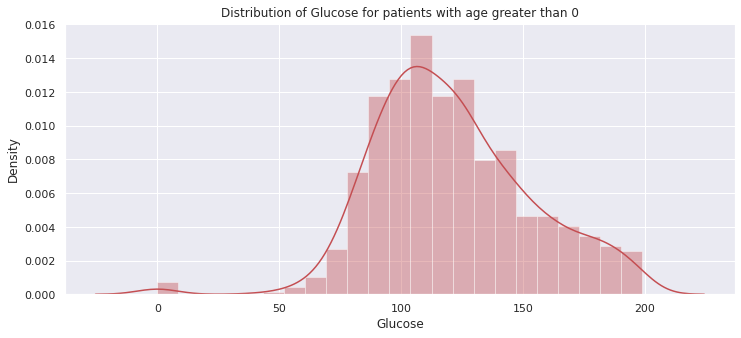

In [38]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Glucose for patients with age greater than 0")
ax = sns.distplot(df[(df.Age >= 0)]['Glucose'], color = 'r')

Insulin Level

In [39]:
def insulin_level(dataframe):
    if dataframe["Insulin"] <= 100:
        return "Normal"
    if dataframe["Insulin"] > 100 and dataframe["Insulin"] <= 126:
        return "Prediabetes"
    elif dataframe["Insulin"] > 126:
        return "Diabetes"
df["Insulin_Level"] = df.apply(insulin_level, axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


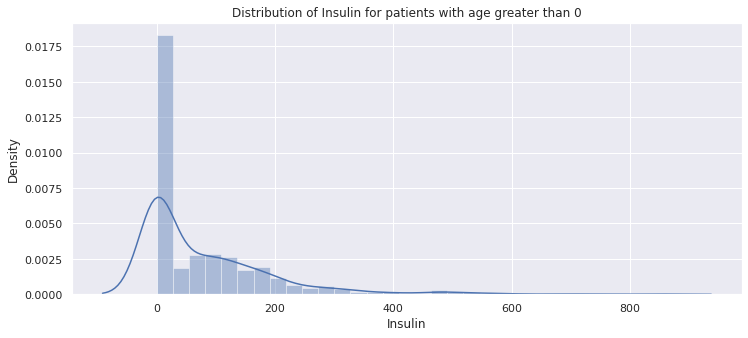

In [40]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Insulin for patients with age greater than 0")
ax = sns.distplot(df[(df.Age >= 0)]['Insulin'], color = 'b')

Blood pressure level

In [41]:
def bloodpressure_level(dataframe):
    if dataframe["BloodPressure"] <= 79:
        return "Normal"
    if dataframe["BloodPressure"] > 79 and dataframe["BloodPressure"] <= 89:
        return "Prehypertension"
    elif dataframe["BloodPressure"] > 89:
        return "Hypertension"
df["Bloodpressure_Level"] = df.apply(bloodpressure_level, axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


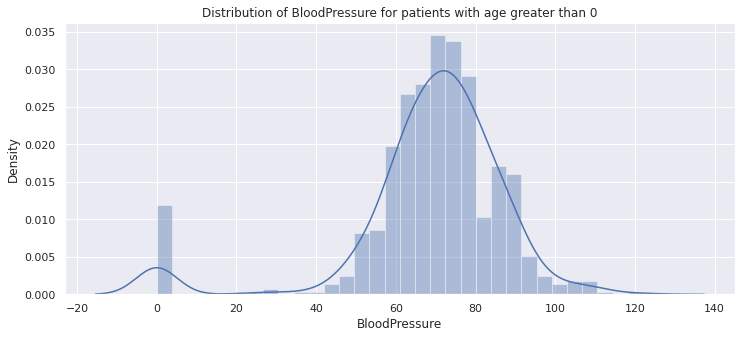

In [42]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BloodPressure for patients with age greater than 0")
ax = sns.distplot(df[(df.Age >= 0)]['BloodPressure'], color = 'b')

Glucose level by Body Mass Index(BMI)

In [43]:
df["glucose_per_bmi"] = df["Glucose"] / df["BMI"]

Insulin level by age

In [44]:
df["insulin_per_age"] = df["Insulin"] / df["Age"]

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Cat,BMI_Group,Glucose_Level,Insulin_Level,Bloodpressure_Level,glucose_per_bmi,insulin_per_age
0,6,148,72,35,0,33.600,0.627,50,1,Adult,Obese,Abnormal,Normal,Normal,4.405,0.000
1,1,85,66,29,0,26.600,0.351,31,0,Adult,Overweight,Normal,Normal,Normal,3.195,0.000
2,8,183,64,0,0,23.300,0.672,32,1,Adult,Normal,Abnormal,Normal,Normal,7.854,0.000
3,1,89,66,23,94,28.100,0.167,21,0,Young,Overweight,Normal,Normal,Normal,3.167,4.476
4,0,137,40,35,168,43.100,2.288,33,1,Adult,Obese,Normal,Diabetes,Normal,3.179,5.091


In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Cat,BMI_Group,Glucose_Level,Insulin_Level,Bloodpressure_Level,glucose_per_bmi,insulin_per_age
0,6,148,72,35,0,33.600,0.627,50,1,Adult,Obese,Abnormal,Normal,Normal,4.405,0.000
1,1,85,66,29,0,26.600,0.351,31,0,Adult,Overweight,Normal,Normal,Normal,3.195,0.000
2,8,183,64,0,0,23.300,0.672,32,1,Adult,Normal,Abnormal,Normal,Normal,7.854,0.000
3,1,89,66,23,94,28.100,0.167,21,0,Young,Overweight,Normal,Normal,Normal,3.167,4.476
4,0,137,40,35,168,43.100,2.288,33,1,Adult,Obese,Normal,Diabetes,Normal,3.179,5.091


# Encoding

In [47]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose_per_bmi,insulin_per_age,Age_Cat_Young,Age_Cat_Adult,Age_Cat_Senior,BMI_Group_Obese,BMI_Group_Overweight,BMI_Group_Underweight,Glucose_Level_Normal,Insulin_Level_Normal,Insulin_Level_Prediabetes,Bloodpressure_Level_Normal,Bloodpressure_Level_Prehypertension
0,6,148,72,35,0,33.600,0.627,50,1,4.405,0.000,0,1,0,1,0,0,0,1,0,1,0
1,1,85,66,29,0,26.600,0.351,31,0,3.195,0.000,0,1,0,0,1,0,1,1,0,1,0
2,8,183,64,0,0,23.300,0.672,32,1,7.854,0.000,0,1,0,0,0,0,0,1,0,1,0
3,1,89,66,23,94,28.100,0.167,21,0,3.167,4.476,1,0,0,0,1,0,1,1,0,1,0
4,0,137,40,35,168,43.100,2.288,33,1,3.179,5.091,0,1,0,1,0,0,1,0,0,1,0


In [48]:
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
Age_Cat                     category
BMI_Group                     object
Glucose_Level                 object
Insulin_Level                 object
Bloodpressure_Level           object
glucose_per_bmi              float64
insulin_per_age              float64
dtype: object

In [49]:
dff.dtypes

Pregnancies                              int64
Glucose                                  int64
BloodPressure                            int64
SkinThickness                            int64
Insulin                                  int64
BMI                                    float64
DiabetesPedigreeFunction               float64
Age                                      int64
Outcome                                  int64
glucose_per_bmi                        float64
insulin_per_age                        float64
Age_Cat_Young                            uint8
Age_Cat_Adult                            uint8
Age_Cat_Senior                           uint8
BMI_Group_Obese                          uint8
BMI_Group_Overweight                     uint8
BMI_Group_Underweight                    uint8
Glucose_Level_Normal                     uint8
Insulin_Level_Normal                     uint8
Insulin_Level_Prediabetes                uint8
Bloodpressure_Level_Normal               uint8
Bloodpressure

In [50]:
dff.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose_per_bmi,insulin_per_age,Age_Cat_Young,Age_Cat_Adult,Age_Cat_Senior,BMI_Group_Obese,BMI_Group_Overweight,BMI_Group_Underweight,Glucose_Level_Normal,Insulin_Level_Normal,Insulin_Level_Prediabetes,Bloodpressure_Level_Normal,Bloodpressure_Level_Prehypertension
0,6,148,72,35,0,33.600,0.627,50,1,4.405,0.000,0,1,0,1,0,0,0,1,0,1,0
1,1,85,66,29,0,26.600,0.351,31,0,3.195,0.000,0,1,0,0,1,0,1,1,0,1,0
2,8,183,64,0,0,23.300,0.672,32,1,7.854,0.000,0,1,0,0,0,0,0,1,0,1,0
3,1,89,66,23,94,28.100,0.167,21,0,3.167,4.476,1,0,0,0,1,0,1,1,0,1,0
4,0,137,40,35,168,43.100,2.288,33,1,3.179,5.091,0,1,0,1,0,0,1,0,0,1,0


# Machine Learning Model 

In [51]:
pd.isnull(X_train).sum() > 0

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool

In [52]:
dff =dff[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [53]:
# değişkenlerin standartlatırılması
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose_per_bmi,insulin_per_age,Age_Cat_Young,Age_Cat_Adult,Age_Cat_Senior,BMI_Group_Obese,BMI_Group_Overweight,BMI_Group_Underweight,Glucose_Level_Normal,Insulin_Level_Normal,Insulin_Level_Prediabetes,Bloodpressure_Level_Normal,Bloodpressure_Level_Prehypertension
0,0.353,0.744,0.590,0.354,0.000,0.315,0.234,0.483,1.000,0.534,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
1,0.059,0.427,0.541,0.293,0.000,0.172,0.117,0.167,0.000,0.387,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000
2,0.471,0.920,0.525,0.000,0.000,0.104,0.254,0.183,1.000,0.951,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
3,0.059,0.447,0.541,0.232,0.111,0.202,0.038,0.000,0.000,0.384,0.151,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000
4,0.000,0.688,0.328,0.354,0.199,0.509,0.944,0.200,1.000,0.385,0.172,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000


In [54]:
dff[dff==np.inf]=np.nan
dff.fillna(dff.mean(), inplace=True)

In [55]:
y=dff["Outcome"] 
X = dff.drop(["Outcome"],axis=1)

In [56]:
rf_model = RandomForestClassifier(random_state=17)

In [57]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [58]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [59]:
cv_results = cross_validate(rf_model,X,y,cv=10,scoring=["accuracy","f1","roc_auc"]) 

In [60]:
cv_results['test_accuracy'].mean()

0.7795087719298245

In [61]:
cv_results['test_f1'].mean() 

0.6602515089202073

In [62]:
cv_results['test_roc_auc'].mean()

0.8331421884993315

In [63]:
rf_params = { 
             "max_depth":[3,8,None], 
             "max_features":[3,5,7,"auto"],
             "min_samples_split":[2,5,8,15,20],
             "n_estimators":[100,200,500]
            } 

##### You can search with use GridSearchCV method

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
 rf_best_grid = GridSearchCV(rf_model,rf_params, cv=5, n_jobs=-1, verbose= True).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [66]:
# list of the best parameters
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 15,
 'n_estimators': 200}

In [67]:
# set of final model
rf_final = rf_model.set_params(**rf_best_grid.best_params_,random_state = 17).fit(X,y) 
rf_final

RandomForestClassifier(max_features=5, min_samples_split=15, n_estimators=200,
                       random_state=17)

In [68]:
cv_results = cross_validate(rf_final,X,y,cv=10,scoring=["accuracy","f1","roc_auc"]) 

In [69]:
cv_results['test_accuracy'].mean()

0.7702807017543859

In [70]:
cv_results['test_f1'].mean() 

0.6479657059307166

In [71]:
cv_results['test_roc_auc'].mean()

0.8353972323972325

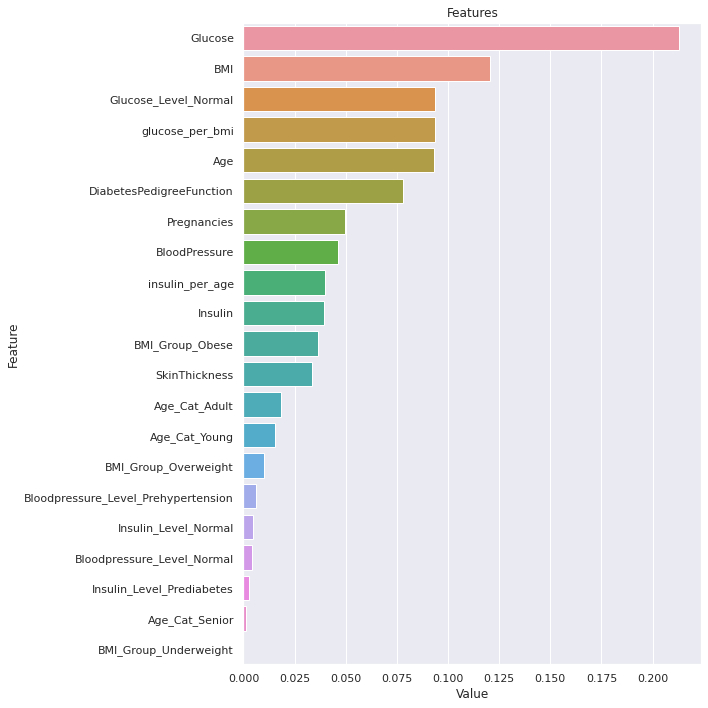

In [72]:
# show final model
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X)